In [1]:
import numpy as np
import math

# Réseau à la main

Un petit réseau de neurones à la main. Ecrire le code pour implémenter le réseau à 6 neurones vu dans les transparents. On n'implémente pas l'apprentissage, mais la prédiction à partir d'une entrée donnée.

In [2]:
EX1_biais = [1,0,0,0,-2,2]
EX1_poids = [1,-2,-1,1,2,-1,-2,-1,3,-1,-1,4]

def EX1_sigmoid(z):
    return(1.0/(1.0+math.exp(-z)))

def EX1_neurone2poids(i):
    return([EX1_poids[2*i],EX1_poids[2*i+1]])

def EX1_neurone(i,in1,in2):
    w_poids       = EX1_neurone2poids(i)
    z_aggregation = in1*w_poids[0] + in2*w_poids[1] + EX1_biais[i]
    y_activation  = EX1_sigmoid(z_aggregation)
    return(y_activation)

def EX1_reseau(in1,in2):
    y1 = EX1_neurone(0,in1,in2)
    y2 = EX1_neurone(1,in1,in2)
    y3 = EX1_neurone(2,y1,y2)
    y4 = EX1_neurone(3,y1,y2)
    y5 = EX1_neurone(4,y3,y4)
    y6 = EX1_neurone(5,y3,y4)
    return(y5,y6)

In [3]:
EX1_reseau(1,-1)

(0.6177047777553412, 0.8291239841574399)

```
## [0.6177047777553412, 0.8291239841574399]
```

In [4]:
EX1_reseau(0,0)


(0.5118473769870672, 0.8543839009877142)

```
## [0.5118473769870672, 0.8543839009877142]
```

# Perceptron

Ecrire des perceptrons (1 neurone) implémentant AND, OR, NOT.

Voir cette [article](https://medium.com/@stanleydukor/neural-representation-of-and-or-not-xor-and-xnor-logic-gates-EX2_perceptron-algorithm-b0275375fea1).

In [5]:
def EX2_perceptron_AND(val1, val2):
    w1 = 1
    w2 = 1
    b = (-2)
    z = val1*w1 + val2*w2 + b
    return(z >= 0)
    

In [6]:
print("EX2_perceptron_AND(0,0) : ", EX2_perceptron_AND(0,0))
print("EX2_perceptron_AND(1,0) : ", EX2_perceptron_AND(1,0))
print("EX2_perceptron_AND(0,1) : ", EX2_perceptron_AND(0,1))
print("EX2_perceptron_AND(1,1) : ", EX2_perceptron_AND(1,1))

EX2_perceptron_AND(0,0) :  False
EX2_perceptron_AND(1,0) :  False
EX2_perceptron_AND(0,1) :  False
EX2_perceptron_AND(1,1) :  True


```
## EX2_perceptron_AND(0,0) :  0
## EX2_perceptron_AND(1,0) :  0
## EX2_perceptron_AND(0,1) :  0
## EX2_perceptron_AND(1,1) :  1
```

In [7]:
def EX2_perceptron_OR(val1, val2):
    w1 = 1
    w2 = 1
    b = (-1)
    z = val1*w1 + val2*w2 + b
    return(z >= 0)
    

In [8]:
print("EX2_perceptron_OR(0,0) : ", EX2_perceptron_OR(0,0))
print("EX2_perceptron_OR(1,0) : ", EX2_perceptron_OR(1,0))
print("EX2_perceptron_OR(0,1) : ", EX2_perceptron_OR(0,1))
print("EX2_perceptron_OR(1,1) : ", EX2_perceptron_OR(1,1))

EX2_perceptron_OR(0,0) :  False
EX2_perceptron_OR(1,0) :  True
EX2_perceptron_OR(0,1) :  True
EX2_perceptron_OR(1,1) :  True


```
## EX2_perceptron_OR(0,0) :  0
## EX2_perceptron_OR(1,0) :  1
## EX2_perceptron_OR(0,1) :  1
## EX2_perceptron_OR(1,1) :  1
```

In [9]:
def EX2_perceptron_NOT(val1):
    w1 = 1
    b = (0)
    z = val1*w1 + b
    return(z < 0)

In [10]:
print("EX2_perceptron_NOT(0) : ", EX2_perceptron_NOT(0))
print("EX2_perceptron_NOT(1) : ", EX2_perceptron_NOT(1))

EX2_perceptron_NOT(0) :  False
EX2_perceptron_NOT(1) :  False


```
## EX2_perceptron_NOT(0) :  1
## EX2_perceptron_NOT(1) :  0
```

# Couche SoftMax
Ajouter une couche SoftMax au premier réseau.

In [11]:
def EX3_SoftMax(in1,in2):
    exp_in1 = math.exp(in1)
    exp_in2 = math.exp(in2)
    somme = exp_in1+exp_in2
    return([exp_in1/somme,exp_in2/somme])

def EX3_reseau(in1,in2):
    return EX3_SoftMax(EX1_reseau(in1,in2)[0],EX1_reseau(in1,in2)[1])

In [12]:
EX3_reseau(1,-1)

[0.44734119804813083, 0.5526588019518692]

```
## [0.44734119804813083, 0.5526588019518692]
```

In [13]:
EX3_reseau(1,1)

[0.3846820512044451, 0.6153179487955549]

```
## [0.3846820512044451, 0.6153179487955549]
```

# Perceptron et porte logique

On écrit nous-même le code pour un perceptron à un neurone apprenant une porte logique à deux entrées (AND, OR, XOR).

Laissons donc la machine les découvrir toute seule !

1. Pour cela nous allons initialiser les poids à 0.

2. Puis nous ferons une boucle de plusieurs itérations.

3. A chaque itération nous calculerons la somme des produits entre les poids et les valeurs. Nous utiliserons par commodité la fonction « dot » de la librairie NumPy qui permet de faire toute seule le produit scalaire (dot product).

4. Cette somme sera déduite du résultat attendu, pour calculer la valeur de l’erreur.

5. On multiplie ensuite cette erreur par les valeurs d’entrée et le taux d’apprentissage pour déterminer les nouveaux poids. C’est l’algorithme de descente de gradient, appliqué à un réseau d'un neurone, avec une fonction de perte simple. Le taux d’apprentissage permet d’ajuster à quelle vitesse on apprend. S’il est trop faible l’apprentissage sera long, s’il est trop élevé on n’arrivera pas à apprendre. Ici nous utiliserons une valeur de 1.

6. On recommence l’opération un certain nombre de fois.

A la fin on affiche le résultat de chaque valeur d’entrée possible pour vérifier que l’ordinateur a apprit correctement.

In [14]:
from random import choice
from pylab import plot, ylim, show

# Fonction de pre-activation
# Elle prend en entree la valeur des poids
# Et les valeurs d'entree des neurones (les entree + le biais)
def pre_activation(poids, valeurs_entrees):
    # On realise le produit scalaire (dot product)
    produit_scalaire = poids.T.dot(valeurs_entrees)
    return(produit_scalaire)

# Fonction d'activation
def fonction_d_activation(produit_scalaire):
    # On retourne 1 si le produit_scalaire est superieur ou egal a 0, 0 sinon
    if produit_scalaire >= 0:
        return(1)
    else:
        return(0)

# La prediction consiste a pravoir la valeur attendue en sortie en fontion
# des valeurs d'entrae et des poids
def faire_une_prediction(poids, valeurs_entrees):
    produit_scalaire = pre_activation(poids, valeurs_entrees)
    prediction       = fonction_d_activation(produit_scalaire)
    return(prediction)

def entrainement_du_model(donnees_entrainement, nombre_epoch=10, taux_apprentissage = 1):
    # Epoch : une epoch est un apprentissage sur le jeux de donnees complet
    # Il en faut plusieurs pour arriver a apprendre correctement
    # Une iteration est le passage sur une donnee, il y a donc plusieurs iteration par Epoch.
    # Initialisation des 3 valeurs de poids (entree1, entree2 et biais)
    poids = np.zeros(3)
    # Initialisation d'un tableau pour stocker l'historique des erreurs
    historique_des_erreurs = []
    # On fixe le nombre d'itérations
    # Avec un gros jeux de donnees on piocherait aleatoirement des valeurs
    # Ici on prend tous le jeu de donnees a chaque fois
    nombre_iteration = len(donnees_entrainement)
    for epoch in range(nombre_epoch):
        for i in range(nombre_iteration):
            # On recupere les donnees d'entree et le resultat attendue
            # dans le jeux de donnees d'entrainement
            valeurs_entrees, resultat_attendu = donnees_entrainement[i]
            # On realise une prediction :
            # c'est a dire estimer la valeur attendue en fonction des valeurs d'entree du neurone
            prediction = faire_une_prediction(poids, valeurs_entrees)
            # On soustrait la valeur predite a la valeur attendue
            # Ce qui nous donne l'erreur, elle est egale a 0 si la prediction etait bonne
            # Si elle est toujours a 0 c'est que l'apprentissage est termine (pas fait automatiquement ici)
            erreur = resultat_attendu - prediction
            # On ajoute cette erreur a l'historique des erreurs
            historique_des_erreurs.append(erreur)
            # Cette erreur est multipliee par le taux d'apprentissage et les valeurs d'entree,
            # pour estimer les poids pour la prochaine iteration
            poids = poids + taux_apprentissage * erreur * valeurs_entrees
            #print("input=", valeurs_entrees, "produit_scalaire=", produit_scalaire, " poids=",poids," resultat_attendu=", resultat_attendu, " fonction_d_activation(produit_scalaire)=", fonction_d_activation(produit_scalaire), " erreur=", erreur)
    print("Erreurs = ", historique_des_erreurs)
    # On affiche le graph de l'evolution de l'erreur
    from pylab import plot, ylim, show
    ylim([-1,1])
    plot(historique_des_erreurs)
    show()
    return(poids)

def utilisation_du_model(poids, donnees):
    # Utilisation des poids issue de l'entrainement sur les differentes valeurs
    for valeurs_entrees,_ in donnees: # "_" sert a ignorer la derniere colonne du tableau qui contient le resultat attendu
     prediction = faire_une_prediction(poids, valeurs_entrees)
     print("{} -> {}".format(valeurs_entrees[:2], prediction))

In [15]:
# Le jeux de donnees avec le resultat attendu pour un OR
# [entree1, entree2, biais d'activation], resultat attendu
donnees_entrainement_OR = [
    (np.array([0,0,1]), 0),
    (np.array([0,1,1]), 1),
    (np.array([1,0,1]), 1),
    (np.array([1,1,1]), 1),
]

# Le jeux de donnees avec le resultat attendu pour un AND
donnees_entrainement_AND = [
    (np.array([0,0,1]), 0),
    (np.array([0,1,1]), 0),
    (np.array([1,0,1]), 0),
    (np.array([1,1,1]), 1),
]

# Le jeux de donnees avec le resultat attendu pour un XOR
donnees_entrainement_XOR = [
    (np.array([0,0,1]), 0),
    (np.array([0,1,1]), 1),
    (np.array([1,0,1]), 1),
    (np.array([1,1,1]), 0),
]

-----> La porte logique AND

Erreurs =  [-1, 0, 0, 1, -1, -1, 0, 1, 0, -1, -1, 1, 0, 0, -1, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


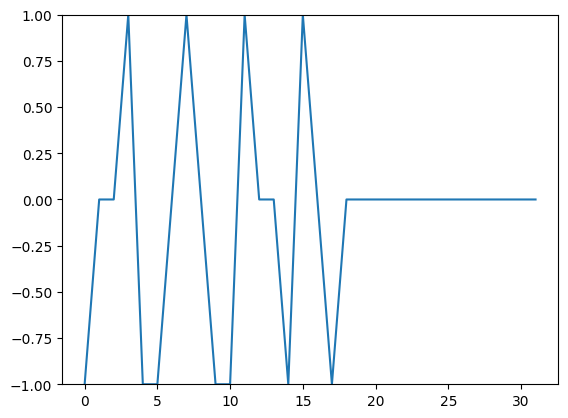

poids_calcules pour AND :  [ 2.  1. -3.]
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1


In [16]:
print('-----> La porte logique AND\n')
# Choix du jeu de donnees AND
donnees_entrainement = donnees_entrainement_AND
# Le model est la structure du reseau de neurones, ici il n'y a qu'un neurone
# L'entrainement consiste a calculer/determiner les poids en fonction du resultat attendu. Cette etape s'appel "train" ou "fit" en anglais
poids_calcules = entrainement_du_model(donnees_entrainement, nombre_epoch=8)
print("poids_calcules pour AND : ", poids_calcules)
utilisation_du_model(poids_calcules, donnees_entrainement)

```
## -----> La porte logique AND
##
## Erreurs =  [-1, 0, 0, 1, -1, -1, 0, 1, 0, -1, -1, 1, 0, 0, -1, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
## poids_calcules pour AND :  [ 2.  1. -3.]
## [0 0] -> 0
## [0 1] -> 0
## [1 0] -> 0
## [1 1] -> 1
```

![and](and.png)


-----> La porte logique OR

Erreurs =  [-1, 1, 0, 0, -1, 0, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


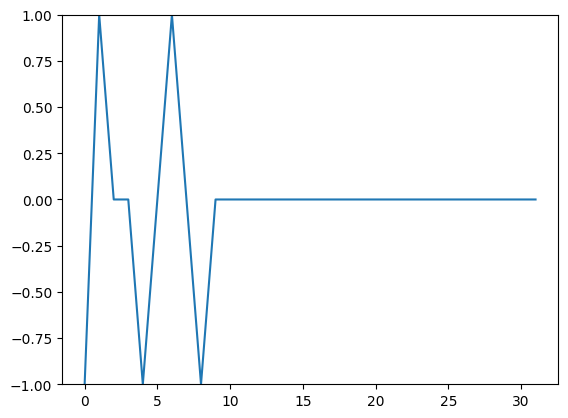

poids_calcules pour OR :  [ 1.  1. -1.]
[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 1


In [17]:
print('\n-----> La porte logique OR\n')
# Entrainement sur le jeu de donnees OR
donnees_entrainement = donnees_entrainement_OR
poids_calcules = entrainement_du_model(donnees_entrainement, nombre_epoch=8)
print("poids_calcules pour OR : ", poids_calcules)
utilisation_du_model(poids_calcules, donnees_entrainement)

```
## -----> La porte logique OR
##
## Erreurs =  [-1, 1, 0, 0, -1, 0, 1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
## poids_calcules pour OR :  [ 1.  1. -1.]
## [0 0] -> 0
## [0 1] -> 1
## [1 0] -> 1
## [1 1] -> 1
```

![or](or.png)


-----> La porte logique XOR

Erreurs =  [-1, 1, 0, -1, 0, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1]


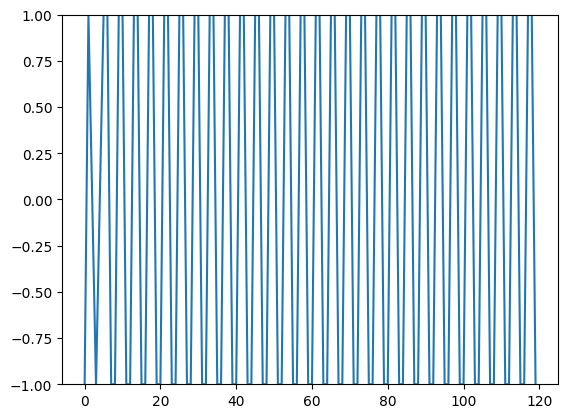

poids_calcules pour XOR :  [-1.  0.  0.]
[0 0] -> 1
[0 1] -> 1
[1 0] -> 0
[1 1] -> 0


In [18]:
print('\n-----> La porte logique XOR\n')
# Entrainement sur le jeu de donnees XOR
donnees_entrainement = donnees_entrainement_XOR
poids_calcules = entrainement_du_model(donnees_entrainement, nombre_epoch=30)
print("poids_calcules pour XOR : ", poids_calcules)
utilisation_du_model(poids_calcules, donnees_entrainement)

```
## -----> La porte logique XOR
##
## Erreurs =  [-1, 1, 0, -1, 0, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1]
## poids_calcules pour XOR :  [-1.  0.  0.]
## [0 0] -> 1
## [0 1] -> 1
## [1 0] -> 0
## [1 1] -> 0
```

![xor](xor.png)

On s'apercoit que ca ne marche pas bien pour XOR. 

# Keras

On reprend l'exercice précédent, mais maintenant avec Keras. Essayons de trouver des architectures simples permettant d'apprendre ces portes logiques.

In [19]:
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'tensorflow.python'

In [ ]:
# On cree un modele a 1 neurone
model_GATE_1 = Sequential()
model_GATE_1.add(Dense(1, input_dim=2, kernel_initializer='uniform', activation='linear'))
model_GATE_1.compile(loss='mean_squared_error',optimizer='adam',metrics=['binary_accuracy'])

In [ ]:
# Jeu d'entrainement
X_AND = np.array([[0,0],[0,1],[1,0],[1,1]], 'float32')
y_AND = np.array([[0],[0],[0],[1]], 'float32')

X_OR = np.array([[0,0],[0,1],[1,0],[1,1]], 'float32')
y_OR = np.array([[0],[1],[1],[1]], 'float32')

X_XOR = np.array([[0,0],[0,1],[1,0],[1,1]], 'float32')
y_XOR = np.array([[0],[1],[1],[0]], 'float32')

In [ ]:
# On l'utilise pour AND, OR, XOR
model_GATE_1.fit(X_AND, y_AND, batch_size=1, epochs=500, verbose=0)
print('AND\n',model_GATE_1.predict(X_AND))
model_GATE_1.fit(X_OR, y_OR, batch_size=1, epochs=500, verbose=0)
print('OR\n',model_GATE_1.predict(X_OR))
model_GATE_1.fit(X_XOR, y_XOR, batch_size=1, epochs=500, verbose=0)
print('XOR\n',model_GATE_1.predict(X_XOR))

```
## AND
## [[-0.05656542]
## [ 0.28171366]
## [ 0.2839092 ]
## [ 0.6221883 ]]
## OR
## [[0.23869596]
## [0.74797744]
## [0.747899  ]
## [1.2571805 ]]
## XOR
## [[0.2950383 ]
## [0.46415508]
## [0.46454698]
## [0.6336638 ]]
```

Commentaires ?

In [ ]:
# On cree un modele a 16+1 neurones
model_GATE_2 = Sequential()
model_GATE_2.add(Dense(16,  input_dim=2, kernel_initializer='uniform', activation='linear'))
model_GATE_2.add(Dense(1,  kernel_initializer='uniform', activation='linear'))
model_GATE_2.compile(loss='mean_squared_error',optimizer='adam',metrics=['binary_accuracy'])

In [ ]:
model_GATE_2.fit(X_AND, y_AND, batch_size=1, epochs=500, verbose=0)
print('AND\n',model_GATE_2.predict(X_AND))
model_GATE_2.fit(X_OR, y_OR, batch_size=1, epochs=500, verbose=0)
print('OR\n',model_GATE_2.predict(X_OR))
model_GATE_2.fit(X_XOR, y_XOR, batch_size=1, epochs=500, verbose=0)
print('XOR\n',model_GATE_2.predict(X_XOR))

```
## AND
## [[-0.24956843]
## [ 0.25079954]
## [ 0.24919148]
## [ 0.74955946]]
## OR
## [[0.24835508]
## [0.7467753 ]
## [0.7471659 ]
## [1.2455862 ]]
## XOR
## [[0.43765485]
## [0.4907372 ]
## [0.4912936 ]
## [0.544376  ]]
```

In [ ]:
# On change les fonctions d'activation
model_GATE_3 = Sequential()
model_GATE_3.add(Dense(16,  input_dim=2, kernel_initializer='uniform', activation='relu'))
model_GATE_3.add(Dense(1,  kernel_initializer='uniform', activation='sigmoid'))
model_GATE_3.compile(loss='mean_squared_error',optimizer='adam',metrics=['binary_accuracy'])

In [ ]:
model_GATE_3.fit(X_AND, y_AND, batch_size=1, epochs=500, verbose=0)
print('AND\n',model_GATE_3.predict(X_AND))
model_GATE_3.fit(X_OR, y_OR, batch_size=1, epochs=500, verbose=0)
print('OR\n',model_GATE_3.predict(X_OR))
model_GATE_3.fit(X_XOR, y_XOR, batch_size=1, epochs=500, verbose=0)
print('XOR\n',model_GATE_3.predict(X_XOR))

```
## AND
## [[0.02520248]
## [0.10788918]
## [0.12162659]
## [0.8556914 ]]
## OR
## [[0.05734885]
## [0.9641379 ]
## [0.96226853]
## [0.99985147]]
## XOR
## [[0.02720192]
## [0.9822955 ]
## [0.98179877]
## [0.9999757 ]]
```

In [ ]:
# On met 2 couches cachees
model_GATE_4 = Sequential()
model_GATE_4.add(Dense(16,  input_dim=2, kernel_initializer='uniform', activation='relu'))
model_GATE_4.add(Dense(16,  kernel_initializer='uniform', activation='relu'))
model_GATE_4.add(Dense(1,  kernel_initializer='uniform', activation='sigmoid'))
model_GATE_4.compile(loss='mean_squared_error',optimizer='adam',metrics=['binary_accuracy'])

In [ ]:
model_GATE_4.fit(X_XOR, y_XOR, batch_size=1, epochs=500, verbose=0)
print('XOR\n',model_GATE_4.predict(X_XOR))

```
## XOR
## [[0.08140022]
## [0.96489716]
## [0.97951764]
## [0.01660845]]
```

Discussion ?

# Quelques exemples avec Keras

On donne ici quelques exemples pour configurer un réseau de neurone avec Keras (voir la [documentation](https://keras.io/api/)).

On considère des réseaux de type `percepron multicouches` (MLP : Multi-Layer Perceptron).

## Classification binaire

- 1 couche d'entrée avec 12 neurones, chacun connecté une donnée d'entrée de dimension 8
- 1 couche cachée avec 8 neurones, entièrement connectée aux couches d'entrée et de sortie
- 1 couche de sortie avec 1 neurone, la fonction d'activation 'sigmoid' renvoyant une valeur comprise dans l'intervalle [0,1]

L'option `kernel_initializer` signifie que les poids du modèle sont initialisés avec des valeurs aléatoires suivant une distribution uniforme. On peut aussi spécifier l'option `bias_initializer`.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

## Classification multi-classes

On ajoute en plus des couches de type `Dropout`.
La couche de type `Dropout` met aléatoirement les données d'entrée à 0 avec une fréquence $\tau$ à chaque étape de la période d'apprentissage, ce qui permet d'éviter le surajustement (overfitting). Les entrées qui ne sont pas mises à 0 sont mises à l'échelle par $1/(1 - \tau)$ de sorte que la somme de toutes les entrées reste inchangée.

Notez que la couche `Dropout` ne s'applique que lorsque l'apprentissage est défini à `True`, de sorte qu'aucune valeur n'est abandonnée pendant l'inférence. Lors de l'utilisation de `model.fit()`, l'apprentissage sera automatiquement réglé sur `True`.

In [ ]:
from keras.layers import Dropout

model=Sequential()
model.add(Dense(512, activation="relu", input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

Pour faciliter l'interprétation de la couche de sortie (avec 10 classes), on active la fonction `softmax`.

## Régression

Il est peut spécifier directement la taille des données d'entrée.

In [ ]:
model=Sequential()
model.add(Dense(64,activation="relu", input_dim=X_AND.shape[1]))
model.add(Dense(1))